# Building A Handwritten Digits Classifier

In this project, we will
+ explore why image classification is a hard task
+ observe the limitations of traditional machine learning models for image classification
+ train, test, and improve a few different deep neural networks for image classification

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process.

In [10]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [34]:
labels = pd.Series(digits_data['target'])

In [32]:
data = pd.DataFrame(digits_data['data'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


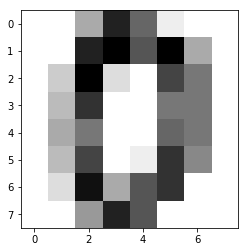

In [14]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap = 'gray_r')

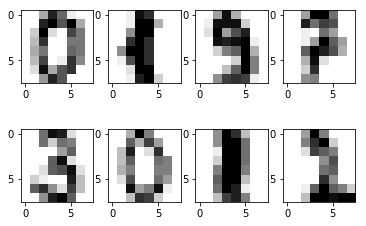

In [20]:
f, axarr = plt.subplots(2,4)

axarr[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap = "gray_r")
axarr[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap = "gray_r")
axarr[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap = "gray_r")
axarr[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap = "gray_r")

axarr[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap = "gray_r")
axarr[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap = "gray_r")
axarr[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap = "gray_r")
axarr[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap = "gray_r")



## K-Nearest Neighbor 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

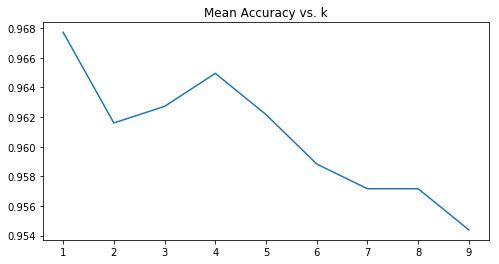

In [40]:
k_values = list(range(1, 10))
k_overall_accuracy = []
for k in k_values:
    knn_acc = cross_validate(k)
    k_mean_acc = np.mean(knn_acc)
    k_overall_accuracy.append(k_mean_acc)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracy)
plt.show()

## Neural Network with One Hidden Layer

In [42]:
from sklearn.neural_network import MLPClassifier

# 50% Train / test validation
def train_nn(hn, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes = (hn,), activation = 'logistic')
    nn.fit(train_features, train_labels)
    return nn

def test(nn, test_features, test_labels):
    predictions = nn.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(hn):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(hn, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
nn_one_accuracies = cross_validate(8)
np.mean(nn_one_accuracies)

C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

0.866994555803019

In [43]:
neurons = [8, 16, 32, 64, 128, 256]

overall_accuracy = []
for n in neurons:
    acc = cross_validate(n)
    acc_mean = np.mean(acc)
    overall_accuracy.append(acc_mean)
overall_accuracy

C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

[0.8692303885176936,
 0.92653427369463,
 0.9437923781242268,
 0.9493603068547389,
 0.9560368720613709,
 0.9549208116802771]

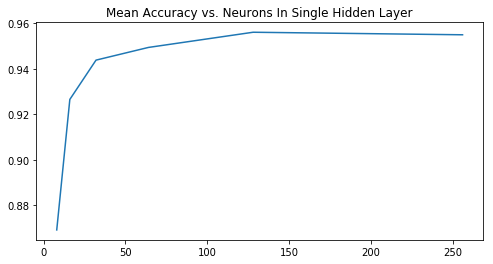

In [48]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

plt.plot(neurons, overall_accuracy)

### Summary:

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 86% to approximately 94%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

## Neural Network with Two Hidden Nodes

In [50]:
# 50% Train / test validation
def train_nn(hn, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes = (hn,hn), activation = 'logistic')
    nn.fit(train_features, train_labels)
    return nn

def test(nn, test_features, test_labels):
    predictions = nn.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(hn):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(hn, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
nn_one_accuracies = cross_validate(64)
np.mean(nn_one_accuracies)

C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

0.942121999505073

C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

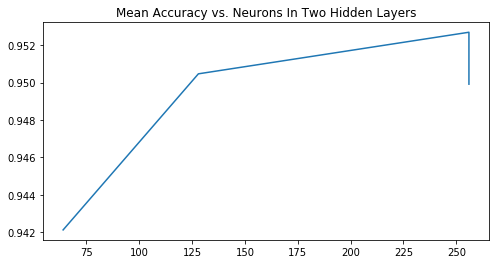

[0.9421195248700817,
 0.9504701806483543,
 0.9526948775055678,
 0.9499158624102945]

In [54]:
nn_two_neurons = [64, 128, 256, 256]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")


plt.plot(nn_two_neurons, nn_two_accuracies)
plt.show()
nn_two_accuracies

## Summary

Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.


## Neural Network with Three Hidden Layers

In [56]:
def train_nn(hn, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes = (hn,hn, hn), activation = 'logistic')
    nn.fit(train_features, train_labels)
    return nn

def test(nn, test_features, test_labels):
    predictions = nn.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(hn):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(hn, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        

C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

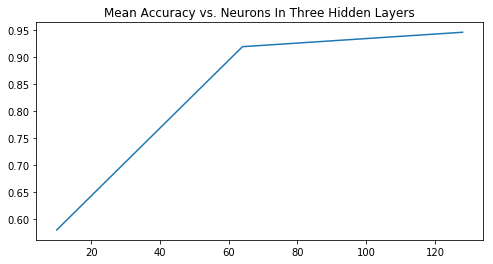

In [58]:

neuron = [10, 64, 128]
overall_accuracy = []
for n in neuron:
    nn_three_accuracies = cross_validate(n)
    nn_mean = np.mean(nn_three_accuracies)
    overall_accuracy.append(nn_mean)
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")


plt.plot(neuron, overall_accuracy)

In [59]:
overall_accuracy

[0.5803823311061618, 0.9193033902499381, 0.9460158376639446]

## Summary

Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.
